### Homework 1

 <b>Problem 1: Extracting Qubit phase</b>
 
 
 Suppose that we have the Qubit in the state 
  \begin{align} \label{Eq:1} \tag{1} 
  |\psi\rangle = \sin\theta|0\rangle + e^{i\varphi}\cos\theta|1\rangle
  \end{align}
  Show how using the measurement in computational basis 
 to measure the angle $\varphi$ provided $\theta$ is known.
    Write the code using Qiskit which prepares this state 
  and performs this measurement. Visualise the circuit. 
  Give link to jupyter notebook. 
  
  <b> Solution </b>
  Let's apply Hadamard gate to the state (1)
 \begin{align} \nonumber
  H|\psi\rangle = \frac{(\sin\theta + e^{i\varphi} \cos\theta )}{\sqrt{2}}|0\rangle + 
  \frac{(\sin\theta - e^{i\varphi} \cos\theta )}{\sqrt{2}} \cos\theta|1\rangle
  \end{align}
  Measuerement after applying the Hadamard gate is called measurement in the superposition basis. 
  Then, measurement of the state $\psi$ in superposition basis will give the probabilities $(1\pm \cos\varphi\sin(2\theta))/2$ which allows determining both angles $\theta$ and $\varphi$. 


<b> Now let's implement that using qiskit. </b> 

In [29]:
#!pip install qiskit
import numpy as np
import qiskit as qk
from qiskit import IBMQ,Aer
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi


import Qconfig_IBMQ_experience
IBMQ.save_account(Qconfig_IBMQ_experience.APItoken, overwrite=True)
IBMQ.load_account()



ibmqfactory.load_account:WARNING:2020-11-24 22:20:54,933: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

Use the custom $U_3$ gate to prepare the required state with $\theta=\varphi=\pi/3$

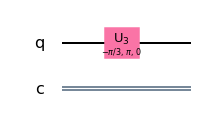

In [57]:
#qreg_q = QuantumRegister(1, 'q')
#creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(1, 1)
circuit.u3(-pi/3, pi, 0, range(1))
circuit.draw(output='mpl')

Measuring in the computational basis gives the amplitudes which ideally should be $\cos^2(\pi/3)=0.25$ and $\sin^2(\pi/3)=0.75$. 

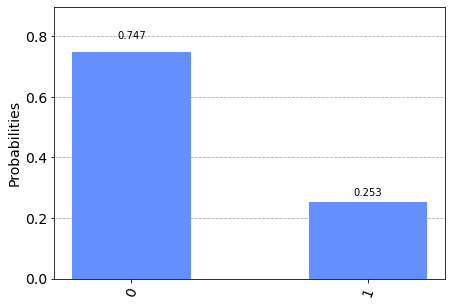

In [67]:
circuit = QuantumCircuit(1, 1)
circuit.u3(-pi/3, pi+pi/3, 0, range(1))
circuit.measure(range(1),range(1))
backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute(circuit,backend=backend,shots=1024)
resultZSim=jobIBM.result()
plot_histogram([resultZSim.get_counts(circuit)])

Measuring in the superposition basis gives the coeffitients which ideally should be  $(1 + \cos\varphi\sin(2\theta))/2=0.716$ and $(1 - \cos\varphi\sin(2\theta))/2=0.284$

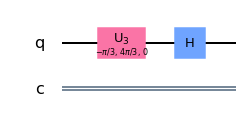

In [68]:
circuit = QuantumCircuit(1, 1)
circuit.u3(-pi/3, pi+pi/3, 0, range(1))
circuit.h(range(1))
circuit.draw(output='mpl')

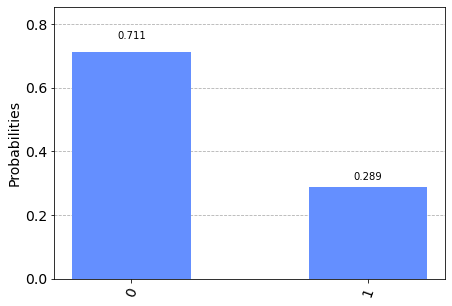

In [69]:
circuit1 = QuantumCircuit(1, 1)
circuit1.u3(-pi/3, pi+pi/3, 0, range(1))
circuit1.h(range(1))
circuit1.measure(range(1),range(1))
backend=Aer.get_backend('qasm_simulator')
#jobIBM=qk.execute(circuit,backend=backend,shots=1024)
jobIBM=qk.execute(circuit1,backend=backend,shots=1024)
resultZSim=jobIBM.result()
plot_histogram([resultZSim.get_counts(circuit1)])

<b> Problem 2: Single Qubit state preparation </b>
    
  Suggest a circuit which uses fixed number of standard gates: $X$, $H$, $S$ and $R_z(\gamma)$
  where $R_z(\gamma)$ is rotation around $z$ axis by an arbitrary angle $\gamma$ 
  to prepare the state $|\psi\rangle = \sin\theta|0\rangle + e^{i\varphi}\cos\theta|1\rangle$ modulo the total phase of the wave function. 
  Compare the accuracy of this procedure  with custom $U_3$ gate at IMB Quantum
  for the angles $\varphi=\theta = \pi/3$. 
    Write the code using Qiskit, give link to jupyter notebook. 
  
<b> Solution </b> 
  We can search for the  transformation using the following chain of transforms 
  
  $H |0\rangle = (|0\rangle + |1\rangle )/\sqrt{2}$, 
  
  $R_z(2 \theta  + \pi) H |0\rangle = (|0\rangle - e^ {2i \theta } |1\rangle )/\sqrt{2} $,
  
  $H R_z(2 \theta+ \pi) H |0\rangle = -i e^ {i \theta } (\sin\theta|0\rangle + i  \cos \theta|1\rangle )$,
  
  $R_z(\varphi-\pi/2) H R_z(2 \theta+ \pi) H |0\rangle =  -i e^ {i \theta } (\sin \theta|0\rangle + e^{i\varphi} \cos \theta |1\rangle )$

  Below we check this state by comparing with the actions if custom $U_3$ operator discussed above.
  
  <br />
<br />
  


Measuring in the computational basis gives the amplitudes which ideally should be $\cos^2(\pi/3)=0.25$ and $\sin^2(\pi/3)=0.75$. 

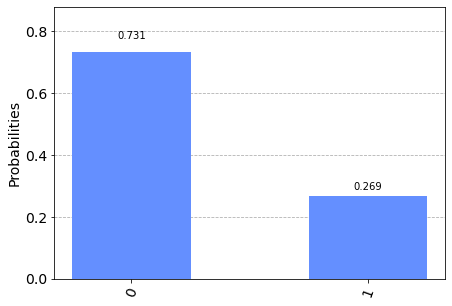

In [73]:
circuit1 = QuantumCircuit(1, 1)
circuit1.h(range(1))
circuit1.rz(pi*2/3 + pi, range(1))
circuit1.h(range(1))
circuit1.rz(pi/3- pi/2, range(1))
circuit1.measure(range(1),range(1))
backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute(circuit1,backend=backend,shots=1024)
resultZSim=jobIBM.result()
plot_histogram([resultZSim.get_counts(circuit1)])

Measuring in the superposition basis gives the coeffitients which ideally should be  $(1 + \cos\varphi\sin(2\theta))/2=0.716$ and $(1 - \cos\varphi\sin(2\theta))/2=0.284$

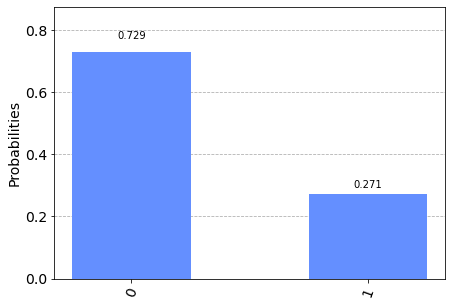

In [71]:
circuit1 = QuantumCircuit(1, 1)
circuit1.h(range(1))
circuit1.rz(pi*2/3 + pi, range(1))
circuit1.h(range(1))
circuit1.rz(pi/3- pi/2, range(1))
circuit1.h(range(1))
circuit1.measure(range(1),range(1))
backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute(circuit1,backend=backend,shots=1024)
resultZSim=jobIBM.result()
plot_histogram([resultZSim.get_counts(circuit1)])

Let us compare how well the operators  $U_3(2\pi/3, \pi/3, -\pi/3)$ and $R_z(\varphi-\pi/2) H R_z(2 \theta+ \pi) H $ prepare the state on the real quantum computer. 

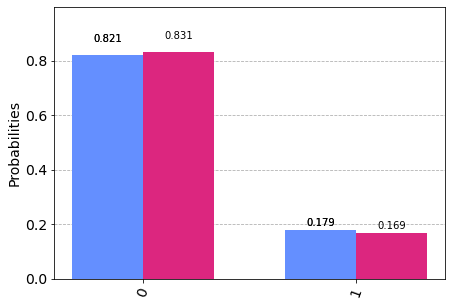

In [75]:
my_provider = IBMQ.get_provider()
backend  = my_provider.get_backend('ibmqx2')

circuitU3 = QuantumCircuit(1, 1)
circuitU3.u3(-pi/3, pi+pi/3, 0, range(1))
circuitU3.measure(range(1),range(1))
jobIBM=qk.execute(circuitU3,backend=backend,shots=1024)
resultSimU3=jobIBM.result()

circuitRHRH = QuantumCircuit(1, 1)
circuitRHRH.h(range(1))
circuitRHRH.rz(pi*2/3 + pi, range(1))
circuitRHRH.h(range(1))
circuitRHRH.rz(pi/3- pi/2, range(1))
circuitRHRH.measure(range(1),range(1))
jobIBM=qk.execute(circuitRHRH,backend=backend,shots=1024)
resultSimuRHRH=jobIBM.result()


plot_histogram([resultSimU3.get_counts(circuitU3), resultSimuRHRH.get_counts(circuitRHRH)])

<b> Problem 3: Useful identities for 1-Qubit and 2-Qubit gates </b>
  
  Prove the following identities 1) $HXH=Z$, 2) $cZ_{12}=cZ_{21}$, 
  3) $H_1 H_2 cX_{12} H_1 H_2 = cX_{21}$, 4) $ce^{i\alpha}_{12} =  U_{1}(\alpha ) $. 
  
  <b> Solution </b> 
   1) $HXH = (\sigma_x + \sigma_z) \sigma_x (\sigma_x + \sigma_z)/2 =
  \sigma_x ( \sigma_x - \sigma_z) (\sigma_x + \sigma_z)/2 = \sigma_z  $- 
  
   2) We can use that $\sigma_z |0\rangle = |0\rangle$ so that $cZ_{12} 
    |0\rangle_1|0\rangle_2  = cZ_{21}  |0\rangle_1|0\rangle_2  $, 
   $cZ_{12}  |1\rangle_1|0\rangle_2  = cZ_{21}  |1\rangle_1|0\rangle_2  $ and so on for all other basis elements in 2-Qubit space. 
   
   3 ) This follows from 1) and 2)
   
   4) $c e^{i\alpha}_{12}  |1\rangle_1|0\rangle_2 = e^{i\alpha}|1\rangle_1|0\rangle_2 $ 
   and
 $c e^{i\alpha}_{12}  |0\rangle_1|0\rangle_2 =|0\rangle_1|0\rangle_2 $ .
 This coincides with the action of the operator 
 $ U_1(\alpha) =\left(
   \begin{smallmatrix}
   1 & 0 
      \\ 0 & e^{i\alpha} 
      \end{smallmatrix}
      \right ) 
      $

  


### Homework 2


<b> Problem 1 : Separable and entangled states</b> 

Determine which of the following states are entangled. If the state is not entangled, show how to write that as a tensor product; if it is entangled, prove it. 

 (a) $\frac{2}{3} |00\rangle + \frac{1}{3} |01\rangle  - \frac{2}{3} |11\rangle $ 
  
 (b) $\frac{1}{2} \left( |00\rangle - i  |01\rangle  + i  |10\rangle + |11\rangle  \right)$ 
 
 (c)  $\frac{1}{2} \left( |00\rangle -   |01\rangle  +  |10\rangle +  |11\rangle  \right)$ 
  
  
 <b> Solution </b>
 The separable two-qubit state is  given by 
 
$ (\alpha_1 |0\rangle + \beta_1 |1\rangle ) (\alpha_2 |0\rangle + \beta_2 |1\rangle )
  =  \alpha_1\alpha_2 |00\rangle + \beta_1\beta_2 |11\rangle + \alpha_1 \beta_2|01\rangle + \alpha_2 \beta_1|10\rangle $

The general two-qubit state is  given by 
$ a_0 |00\rangle + a_3 |11\rangle + a_1|01\rangle + a_2|10\rangle $

So that the separable state satisfies 
 $a_0/a_1 = a_2/a3$. 
 From this criterion only the state (b) is entangled
 which is given as the tensor product $(|0\rangle + i |1\rangle )
 (|0\rangle - i |1\rangle ))$. 

<b> Problem 2: Preparation of the general 2-Qubit pure state </b>

 Using Schmidt decomposition and its relation to the Singular value decomposition of matrices, suggest the algorithm to prepare general 2-Qubit pure state
 \begin{align} \label{Eq:Gen2Qubit} \tag{1}
 |\psi\rangle = a_{00} |00\rangle + a_{01} |01\rangle
  + 
 a_{10} |10\rangle 
  + 
  a_{11} |11\rangle   
 \end{align}
 Apply this procedure to prepare the example 2-Qbit state
  
 (a)  $| \Phi^{\pm} \rangle = \frac{1}{\sqrt{2}} ( | 00 \rangle \pm | 11 \rangle )$  
 
 (b)  $| \Psi^{\pm} \rangle = \frac{1}{\sqrt{2}} ( | 01 \rangle \pm | 10 \rangle ) $
 
 (c) $ \Phi \rangle = \frac{1}{\sqrt{12}} (3 |00\rangle + |01\rangle + |10\rangle  - |11\rangle)$

 The states $| \Phi^{\pm} \rangle $ and $| \Psi^{\pm} \rangle $ 
 are called Bell states, they are used in quantum cryptography  algorithms. 
  Write code in Qiskit, give the link to the Jupyter notebook. 
  
  <b> Solution </b>
  
   First, let us considet the general aproach to the 2-Qubit state preparation. 
   
   Consider the circuit $V_1 U_2cX_{12} B_1 $.    Let's prove that the above circuit prepares the state 
 \begin{align} \label{Eq:psi} \tag{2}
 |\psi\rangle = a_{00}|00\rangle + 
    a_{10}|10\rangle + a_{01}|01\rangle + 
    a_{11}|11\rangle
\end{align}    
   where
    $A= \left( \begin{smallmatrix}
   a_{00} & a_{10} 
      \\ a_{01}  & a_{11} 
           \end{smallmatrix}
            \right) = U B V^T$            
 where  unitary matrices $U$, $V$ and diagonal $B$ present the singular value decomposition of the matrix A. 
  If the matrix coefficients are $V= \left( \begin{smallmatrix}
   v_{11} & v_{12} 
      \\ v_{21}  & v_{22} 
           \end{smallmatrix}
            \right)$, 
            $U= \left( \begin{smallmatrix}
   u_{11} & u_{12} 
      \\ u_{21}  & u_{22} 
           \end{smallmatrix}
            \right)$ ,             
             $B= \left( \begin{smallmatrix}
   b_{1} & 0 
      \\ 0 & b_{2} 
           \end{smallmatrix}
            \right)$
  so that
   \begin{align} \label{Eq:acoeff} \tag{2}
    & a_{00} = v_{11} u_{11} b_1 +
    v_{12} u_{12} b_2 
    \\
    & a_{10} = u_{11} v_{21} b_1 +
    v_{22} u_{12} b_2 
    \\
    &  a_{01} = v_{11} u_{21} b_1 +
    v_{12} u_{22} b_2 
    \\
    &  a_{11} = v_{21} u_{21} b_1 +
    v_{22} v_{22} b_2  
    \end{align}
 

 The action of the above circuit on the state $|00\rangle$ can be calculated  as (here upper and lower Qubits in the circuit correspond to subscript indices $0$ and $1$, respectively )
 \begin{align} 
 & |\psi\rangle    =  V_0 U_1  C_{01} B_0 |00\rangle=  V_0 U_1   
 C_{01}  (b_1|0\rangle + b_2|1\rangle)_0 |0\rangle_1= V_0 U_1 
       (b_1|00\rangle + b_2|11\rangle)= 
 \\     \nonumber
  &    b_1 ( v_{11} |0\rangle + v_{21} |1\rangle)_0 
  ( u_{11} |0\rangle + u_{21} |1\rangle)_1    + 
      b_2 ( v_{12} |0\rangle + v_{22} |1\rangle)_0 
      ( u_{12} |0\rangle + u_{22} |1\rangle)_1=
 \\     \nonumber
&  (b_1 u_{11}v_{11} + b_2 u_{12}v_{12} )|00\rangle + 
 (b_1v_{11} u_{21} + b_2 v_{12}u_{22}) |01\rangle +
 (b_1v_{21} u_{11} + b_2 v_{22}u_{12}) |10\rangle +
  (b_1u_{21} v_{21} + b_2 u_{22}v_{22}) |11\rangle 
 \end{align}
Comparing this equation with the general form \eqref{Eq:psi} we see that the coefficients  are indeed coincide with that of the matrix $A$
\eqref{Eq:acoeff}.  
 
  
  
  
  In general the two-Qubit state \eqref{Eq:Gen2Qubit} 
  as $\psi = V_0 U_1  C_{01} B_0$ where  $A= \left( \begin{smallmatrix}
   a_{00} & a_{10} 
      \\ a_{01}  & a_{11} 
           \end{smallmatrix}
            \right) = U B V^T$.  
  
            
From this general rule we get 

(a) $\Phi^+ =  C_{01}H_0 |00\rangle$,  

(b) $\Psi^+ =  X_0 C_{01} H_0 |00\rangle $, 

(c) $\Phi =   U3_1 (\theta)Z_1U3_0 (\theta) C_{01} U3_0 (\theta_B)  |00\rangle$, 

where $\theta =2arccos( 0.9732)   $, $\theta_B  =2 arccos(0.9342)  $.   

Let us check the state (c) using qiskit. 





First, caclulate the matrices $U$, $V^T$ and $B$ using singular value decomposition for state (C)

In [92]:
from numpy import array
from scipy.linalg import svd
# define a matrix
A = array([[3/np.sqrt(12), 1/np.sqrt(12)], [1/np.sqrt(12), -1/np.sqrt(12)]])
#print(A);
# SVD
U, B, VT = svd(A);
print("U=", U, "\n")

print("B=",B ,"\n")

print("VT=", VT, "\n")


U= [[-0.97324899 -0.22975292]
 [-0.22975292  0.97324899]] 

B= [0.93417236 0.35682209] 

VT= [[-0.97324899 -0.22975292]
 [ 0.22975292 -0.97324899]] 



Matrices $U$ and $V$ are unitary, they can be presented as $U_3(\theta)Z$ and $U_3(\theta)$. Matrix $B$ is non-unitary, but its action on the state $|0\rangle$ is the same as of the gate $U_3(\theta_B)$.

In [114]:

theta=2*np.arccos( 0.9732)  ;
thetaB  = 2*np.arccos(0.9342);


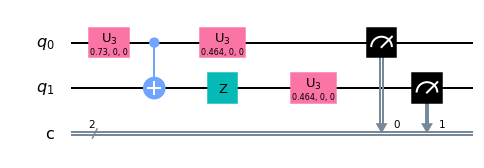

In [112]:
circuit1 = QuantumCircuit(2, 2)
circuit1.u3(thetaB, 0, 0, 0)
circuit1.cx(0, 1)
circuit1.z(1)
circuit1.u3(theta, 0, 0, 0)
circuit1.u3(theta, 0, 0, 1)
circuit1.measure(range(2),range(2))
circuit1.draw(output='mpl')


Let's check that the above circuit yield the state (C). 

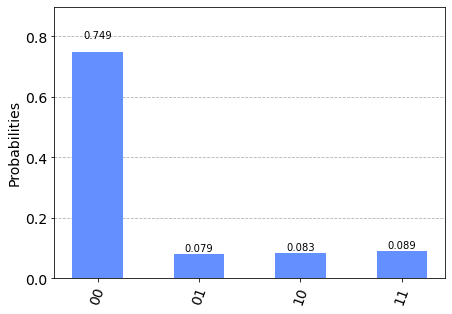

In [113]:
backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute(circuit1,backend=backend,shots=1024)
resultZSim=jobIBM.result()
plot_histogram([resultZSim.get_counts(circuit1)])

<b> Problem 4 : Measuring gate </b>

Let us consider the general state of $n$ Qbits $|\Psi\rangle_n$ which can be written in the form 
 \begin{equation} \label{Eq:P6} \tag{2}
  |\Psi\rangle_{n} = \sum_x \alpha_x |x\rangle_m 
  |\Phi_x\rangle_{n-m}
 \end{equation}
 %
According to the Born rule if we measure $m<n$ Qbits then with probability $|\alpha_x|^2$ the result will be $|x\rangle$ and after this measurement 
the $n$ Qbits will be in the sate 
 \begin{equation} \nonumber
   |x\rangle_m |\Phi_x\rangle_{n-m}
 \end{equation}

(a) Suppose that first $m$ Qbits are measured and immediately after additional $k$  Qbits are measured,  so that $m+k\leq n$. Find the possible states after 
these two measurements and their associated probabilities by applying first $m$ measurements and then $k$ measurements. 

(b) Show that the result obtained in (a) coincides with that of the single measurement of $m+k$ Qbits. 

Hint: use the relation between joint $p(xy)$ and conditional $p(y|x)$ probabilities 
for two outcomes $x$ and $y$:
   \begin{equation} \label{Eq:P6-1} \tag{3}
   p(xy)= p(y|x)p(x)
 \end{equation}   
   
   
   <b> Solution </b> 
   The state \eqref{Eq:P6} in general can be written as 
   \begin{align}
  |\Psi\rangle_{n} = \sum_{x,y,z} \alpha_{xyz} |x\rangle_m 
  |y\rangle_{k} |z\rangle_{n-m-k}  =
   \sum_x \alpha_x |x\rangle_m 
  \sum_{y,z}\frac{\alpha_{xyz}}{\alpha_x}
  |  y\rangle_{k}  |z\rangle_{n-m-k} 
   \end{align}
   where $\alpha_x= \sqrt{\sum_{y,z} |\alpha_{xyz}|^2} $.
  The first measurement yields
  state $|x\rangle_m 
  (\sum_{y,z} \frac{\alpha_{xyz}}{\alpha_x} 
  |  y\rangle_{k}  |z\rangle_{n-m-k}  $   
  with probability $p(x) = |\alpha_x|^2 / \sum_{x} 
  |\alpha_{x}|^2$. 
 The subsequent measurement yields the state   
 $|x\rangle_m (\sum_{z} \frac{\alpha_{xyz}}{\alpha_{xy}} 
  |  y\rangle_{k}  |z\rangle_{n-m-k}  $
 with probability $ p (y|x) = |\alpha_{xy}|^2 /\sqrt{\sum_{y,x} |\alpha_{xy}|^2} $ where $\alpha_{xy} = \sqrt{\sum_z|\alpha_{xyz}|^2}$.
 The single measurement of $k+m$ qubits yields this state with probability 
 $p(xy)= \sum_z |\alpha_{xyz}|^2/\sum_{x,y,z} 
  |\alpha_{xyz}|^2 $. 
  Since $
  |\alpha_{x}|^2= \sum_{y,z} 
  |\alpha_{xyz}|^2$
 It's easy to see that the above probabilities satisfy Eq.\eqref{Eq:P6-1}. 
